In [45]:
from imutils import face_utils
import numpy as np
import imutils, dlib, cv2, csv
import matplotlib.pyplot as plt

사람 얼굴에 랜드마크 68개 찍어내기

In [7]:
def show_raw_detection(image, detector, predictor):
    gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
    
    rects = detector(gray, 1)                     # detector는 관련 모델을 뜻하는 듯하다
                                                  # ex) dogHeadDetector.dat
    for i, rect in enumerate(rects):
        shape = predictor(gray, rect)
        shape = face_utils.shape_to_np(shape)
        
        (x, y, w, h) = face_utils.rect_to_bb(rect)
        cv2.rectangle(image, (x, y), (x + w, y + h), (0, 255, 0), 2)
        
        for (x, y) in shape:
            cv2.circle(image, (x, y), 1, (0, 0, 255), -1)
            
    cv2.imshow('Output', image)
    
    cv2.waitKey(0)
    cv2.destroyAllWindows()

In [9]:
detector = dlib.get_frontal_face_detector()
predictor = dlib.shape_predictor('shape_predictor_68_face_landmarks.dat')

image = cv2.imread('./img/01.png')
image = imutils.resize(image, width=500) 
show_raw_detection(image, detector, predictor)

Detection 0: Left: 84, Top: 164, Right: 506, Bottom: 587, Confidence: 1.0144777297973633


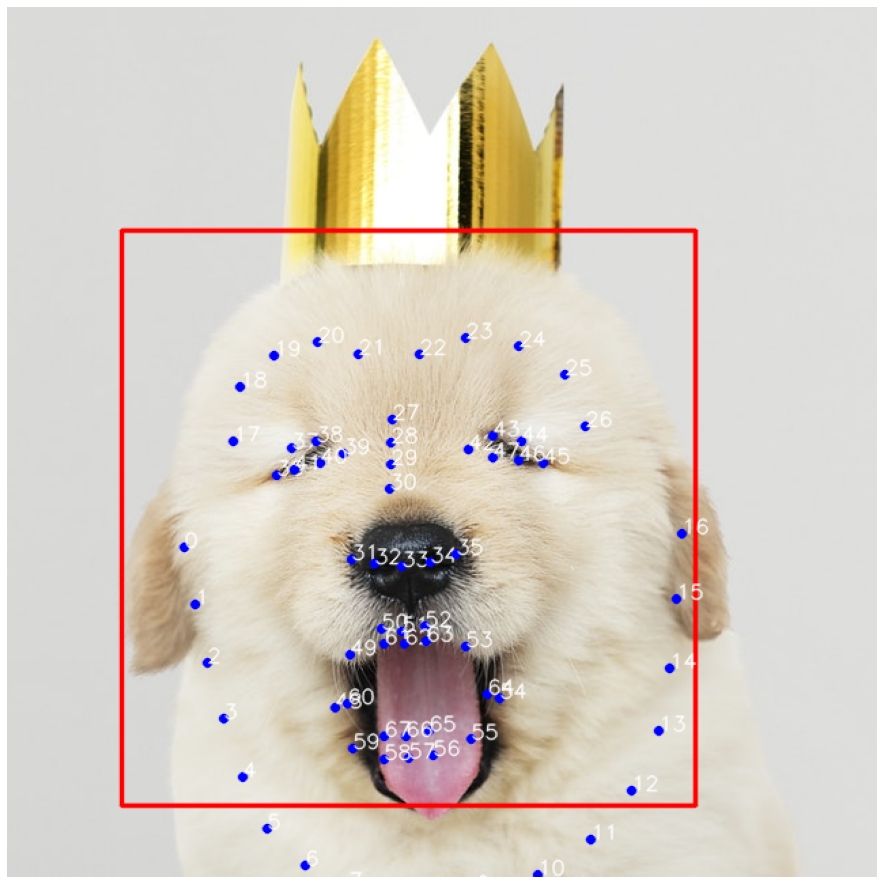

In [17]:
detector = dlib.cnn_face_detection_model_v1('dogHeadDetector.dat')
predictor = dlib.shape_predictor('shape_predictor_68_face_landmarks.dat')

img_path = './img/12.jpg'

img = cv2.imread(img_path)

if img is None:
    print('image read failed')
    sys.exit()
    
img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
    
dets = detector(img, upsample_num_times = 1)

img_result = img.copy()

for i, d in enumerate(dets):
    print('Detection {}: Left: {}, Top: {}, Right: {}, Bottom: {}, Confidence: {}'.format(
    i, d.rect.left(), d.rect.top(), d.rect.right(), d.rect.bottom(), d.confidence))
    
    x1, y1 = d.rect.left(), d.rect.top()
    x2, y2 = d.rect.right(), d.rect.bottom()         # 얼굴 좌표 저장
    
    cv2.rectangle(img_result, (x1, y1), (x2, y2), (255, 0, 0), 2, cv2.LINE_AA)
    
shapes = []

for i, d in enumerate(dets):
    shape = predictor(img, d.rect)
    shape = face_utils.shape_to_np(shape)
    
    for i, p in enumerate(shape):
        shapes.append(shape)
        cv2.circle(img_result, tuple(p), 3, (0, 0, 255), -1, cv2.LINE_AA)
        cv2.putText(img_result, str(i), tuple(p), cv2.FONT_HERSHEY_SIMPLEX, 0.5,
                   (255, 255, 255), 1, cv2.LINE_AA)
        
img_out = cv2.cvtColor(img_result, cv2.COLOR_RGB2BGR)

plt.figure(figsize = (16, 16)), plt.axis('off')
plt.imshow(img_result)

# cv2.imshow('image', img_result)

# cv2.waitKey()
# cv2.destroyAllWindows()

In [47]:
detector = dlib.cnn_face_detection_model_v1('dogHeadDetector.dat')
predictor = dlib.shape_predictor('shape_predictor_68_face_landmarks.dat')

img_path = './img/12.jpg'



img = cv2.imread(img_path)

if img is None:
    print('image read failed')
    sys.exit()
    
img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
    
dets = detector(img, upsample_num_times = 1)

img_result = img.copy()

for i, d in enumerate(dets):
    print('Detection {}: Left: {}, Top: {}, Right: {}, Bottom: {}, Confidence: {}'.format(
    i, d.rect.left(), d.rect.top(), d.rect.right(), d.rect.bottom(), d.confidence))
    
    x1, y1 = d.rect.left(), d.rect.top()
    x2, y2 = d.rect.right(), d.rect.bottom()         # 얼굴 좌표 저장
    
    cv2.rectangle(img_result, (x1, y1), (x2, y2), (255, 0, 0), 2, cv2.LINE_AA)
    
shapes = []
point = []

for i, d in enumerate(dets):
    shape = predictor(img, d.rect)
    shape = face_utils.shape_to_np(shape)
    
    for i, p in enumerate(shape):
        shapes.append(shape)
        cv2.circle(img_result, p, 3, (0, 0, 255), -1, cv2.LINE_AA)
        cv2.putText(img_result, str(i), tuple(p), cv2.FONT_HERSHEY_SIMPLEX, 0.5,
                   (255, 255, 255), 1, cv2.LINE_AA)
        
        
        # 좌표 뽑아오기
        p = p.astype('int')
        
#     print(p)
#     print(type(p))
#     print(p.dtype)
        point.extend(p)
    print(point)
    print(len(point))
        
        
        # csv 파일로 저장하기
    with open('test.csv', 'w', newline = '') as file:
        write = csv.writer(file)
        
        write.writerow(point)
        
        
# img_out = cv2.cvtColor(img_result, cv2.COLOR_RGB2BGR)

# plt.figure(figsize = (16, 16)), plt.axis('off')
# plt.imshow(img_result)

Detection 0: Left: 84, Top: 164, Right: 506, Bottom: 587, Confidence: 1.0144777297973633
[130, 397, 138, 439, 147, 482, 159, 523, 173, 566, 191, 604, 219, 631, 251, 647, 296, 652, 345, 649, 390, 638, 429, 612, 459, 576, 479, 532, 487, 486, 492, 435, 496, 387, 166, 319, 171, 279, 196, 256, 228, 246, 258, 255, 303, 255, 337, 243, 376, 249, 410, 270, 425, 308, 283, 303, 282, 320, 282, 336, 281, 354, 253, 406, 270, 409, 290, 411, 311, 408, 330, 402, 198, 344, 209, 324, 227, 319, 247, 328, 230, 335, 211, 340, 339, 325, 357, 315, 378, 319, 394, 335, 376, 333, 357, 331, 241, 515, 252, 476, 275, 457, 290, 459, 307, 455, 337, 470, 362, 508, 341, 538, 313, 550, 295, 552, 277, 553, 254, 545, 250, 512, 277, 468, 292, 468, 308, 466, 353, 505, 310, 532, 293, 536, 277, 536]
136


In [51]:
a = np.array([0, 0])
b = np.array([2, 2])

c = (a + b) / 2.9
print(c)

[0.68965517 0.68965517]


In [44]:
filename = [12, 15]

print('{}'.format(filename[1]))

15
